In [196]:
import numpy as np
import matplotlib.pyplot as plt
import TS2
import imp

In [206]:
imp.reload(TS2)

# specify boundary values Y0 (t=0) and Y1 (t=1) [phi, theta, vphi, vtheta]
Y0 = np.array([0,0,-0.5,1])
Y1 = np.array([0,np.pi,1,1])

q0,v0 = TS2.sph2vecs(Y0)
print('q0,v0',q0,v0)
q1,v1 = TS2.sph2vecs(Y1)
print('q1,v1:',q1,v1)

Res, L = TS2.geodesic_bvp(Y0,Y1)
Zarr = Res.y
print('Riemannian distance:',L)

# status message (how did the bvp-solver do)
print(Res.message)

# print the residuals of the boundary value conditions
print('Y0-Zarr[:4,0]=', Y0-Zarr[:4,0])
print('Y1-Zarr[:4,-1]=', Y1-Zarr[:4,-1])
print('||Y0-Zarr[:4,0]||=', np.linalg.norm(Y0-Zarr[:4,0]))
print('||Y1-Zarr[:4,-1]||=', np.linalg.norm(Y1-Zarr[:4,-1]))

print(Zarr.shape)
#print(Zarr[0,:])

q0,v0 [1. 0. 0.] [ 0.   1.  -0.5]
q1,v1: [-1.0000000e+00  1.2246468e-16  0.0000000e+00] [-1.2246468e-16 -1.0000000e+00  1.0000000e+00]
Riemannian distance: 3.155522969931843
The algorithm converged to the desired accuracy.
Y0-Zarr[:4,0]= [-1.65282679e-22  6.23914859e-20  0.00000000e+00  0.00000000e+00]
Y1-Zarr[:4,-1]= [5.90117038e-23 0.00000000e+00 0.00000000e+00 0.00000000e+00]
||Y0-Zarr[:4,0]||= 6.239170484662261e-20
||Y1-Zarr[:4,-1]||= 5.901170382320211e-23
(8, 104)


8 104
3.155522969931843
3.4813222202331917


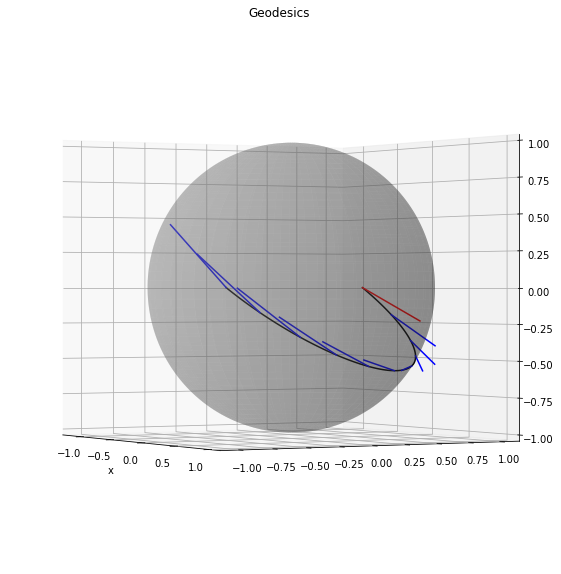

In [207]:
# Set up axes and draw the sphere
def setupAx(num, index, title, srad=1):
    ax = fig.add_subplot(1, num, index, projection='3d')
    ax.set_title(title)
    ax.view_init(elev=0., azim=-30)
    ax.set_box_aspect((1, 1, 0.9))

    # Sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = srad * np.outer(np.cos(u), np.sin(v))
    y = srad * np.outer(np.sin(u), np.sin(v))
    z = srad * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='gray', alpha=0.3)

    return ax

fig = plt.figure(figsize = (10, 10))
ax = setupAx(1, 1, "Geodesics")

X = np.cos(Zarr[0,:])*np.cos(Zarr[1,:])
Y = np.cos(Zarr[0,:])*np.sin(Zarr[1,:])
Z = np.sin(Zarr[0,:])
ax.plot3D(X, Y, Z, color="black", linestyle='-')

n, m = Zarr.shape

print(n,m)
print(L)
print(np.linalg.norm(Y0-Y1))
P=np.round(np.linspace(0,m-1,11)).astype(int)
sfac = max(np.linalg.norm(Y0[2:]), np.linalg.norm(Y0[2:]))
c="red"
for k in P:
    qq,vv=TS2.sph2vecs(Zarr[:,k])
    vvs = vv/sfac*0.5
    ax.plot3D(np.array([qq[0],qq[0]+vvs[0]]),np.array([qq[1],qq[1]+vvs[1]]), np.array([qq[2],qq[2]+vvs[2]]), color=c)
    c="blue"
    
plt.xlabel('x')
plt.show()


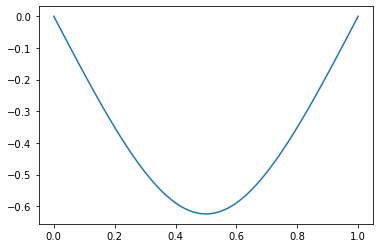

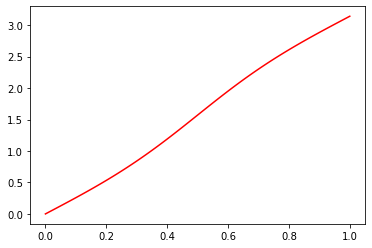

In [210]:
plt.plot(Res.x,Res.y[0,:])
plt.show()
plt.plot(Res.x,Res.y[1,:],color="red")
plt.show()
